In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Superstore.csv', encoding_errors='ignore')
display(df.head())


Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

#TASK 1 A

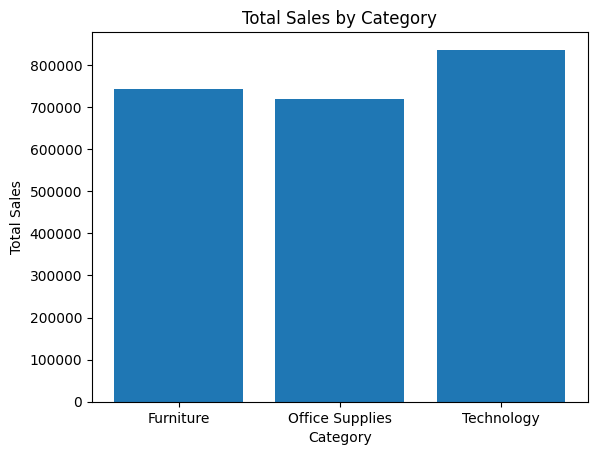

In [13]:
import matplotlib.pyplot as plt


category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.bar(category_sales['Category'], category_sales['Sales'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#Task 1 B

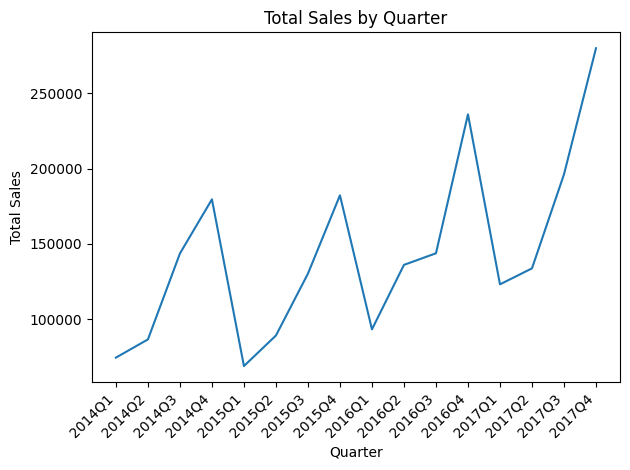

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()

quarterly_sales['Order Date'] = quarterly_sales['Order Date'].astype(str)

plt.plot(quarterly_sales['Order Date'], quarterly_sales['Sales'])
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#TASK 2A

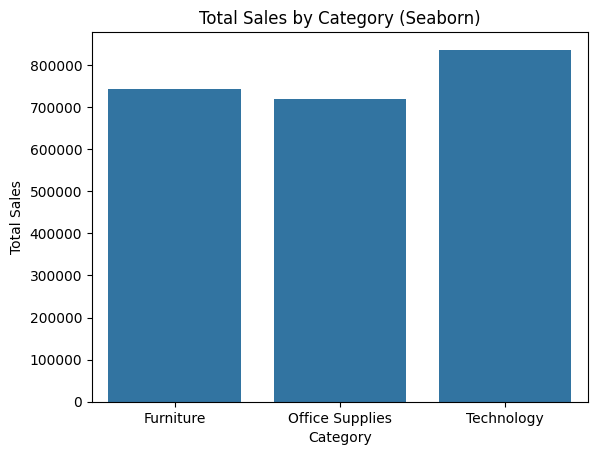

In [15]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Category (Seaborn)')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#TASK 2B

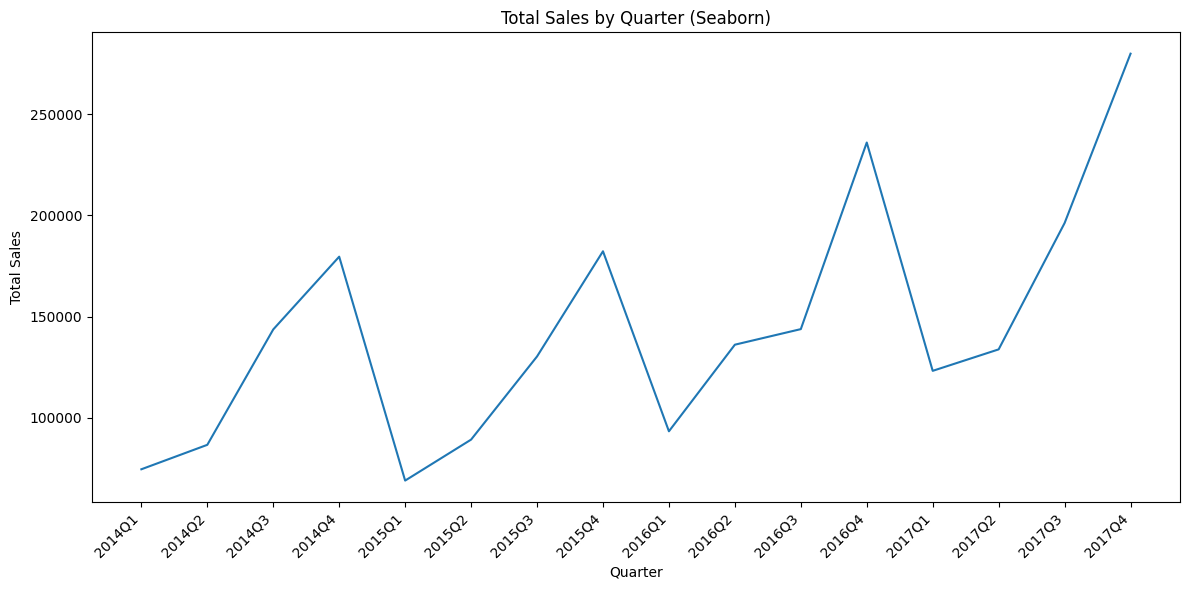

In [16]:
# Task 1B using seaborn
df['Order Date'] = pd.to_datetime(df['Order Date'])

quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()

quarterly_sales['Order Date'] = quarterly_sales['Order Date'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=quarterly_sales)
plt.title('Total Sales by Quarter (Seaborn)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

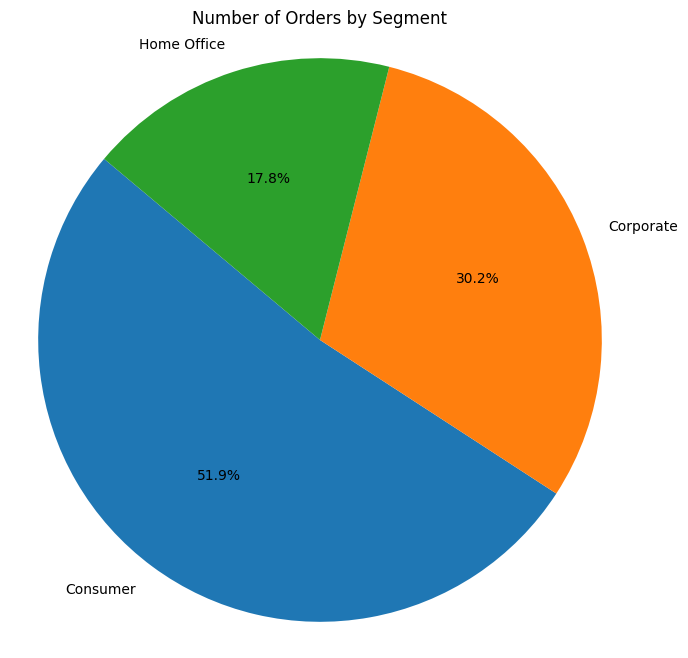

In [17]:
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Orders by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

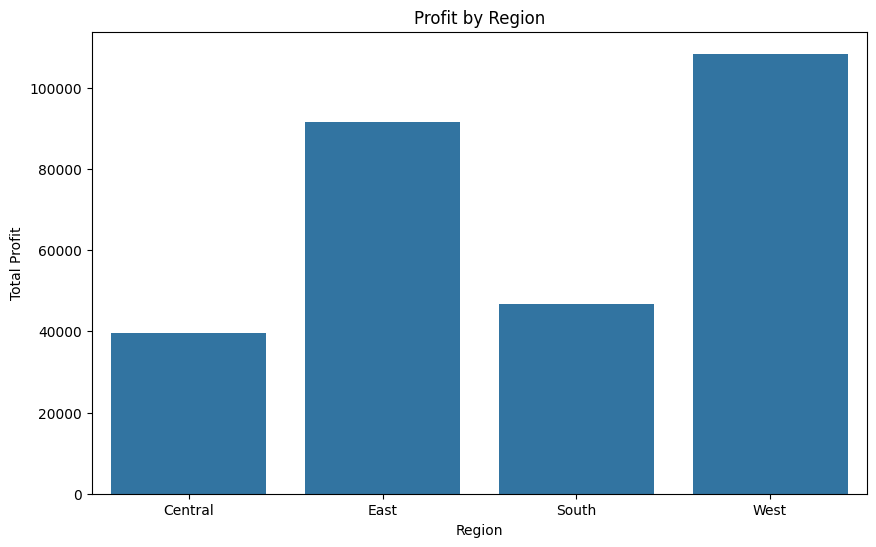

In [18]:
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_profit)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()